In [531]:
from sample_methods import *
from NN_methods import *
import matplotlib.pyplot as plt
import torch

In [5]:
density = 10
R = 10
center1 = (20,20)
r1 = 1
center2 = (50,50)
r2 = 1
truncated = False
cartesian = True

test,area = get_ellipse(density, (1.091726, 1.01921194), 1.7, cartesian)
print(test.shape)
print(get_edge_index2(test,10).shape)
plt.figure(figsize=(10,10))
plt.scatter(test[:,0],test[:,1])
#plt.axis('equal')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()


(get_edge_index(test,10) == get_edge_index2(test,10))

(1, 2)


NameError: name 'get_edge_index2' is not defined

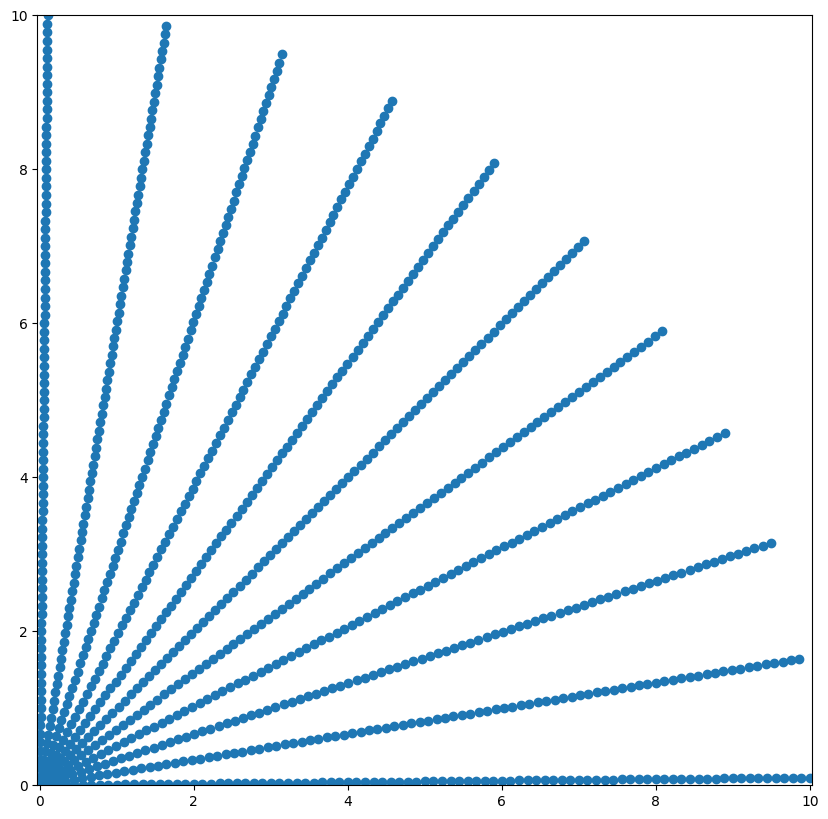

(91, 11)
(91, 11)


In [2]:
angles = np.linspace(0.01, np.pi/2 -0.01, 11)
rmax = 10
density = round(1000)
r = np.linspace(1e-3, rmax, round(density/11))
x = (r[:,np.newaxis]*np.cos(angles))
y = (r[:,np.newaxis]*np.sin(angles))
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.axis('equal')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()
print(x.shape)
print(y.shape)

number of point  2829


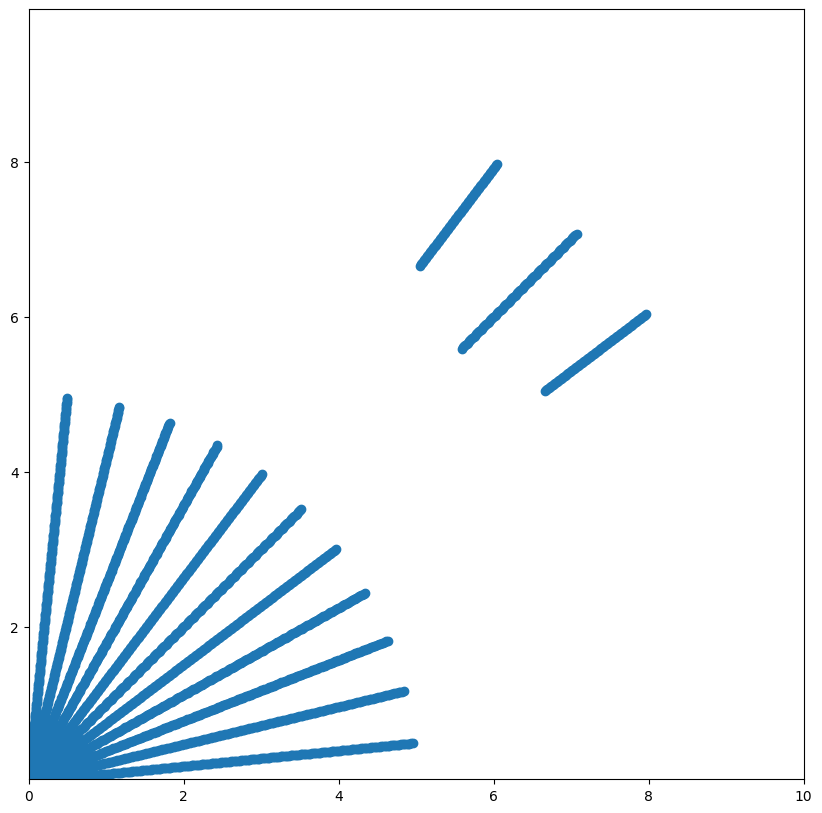

In [3]:
a = 5
b = 5
cartesian = False
angle = np.pi/4
density = 10000/a*10

test, area = get_multiple_circles(density, a, (7,7), 2, cartesian = False)
print("number of point ", len(test))
get_edge_index(test,10)

plt.figure(figsize=(10,10))
plt.scatter(test[:,0],test[:,1])
plt.axis('equal')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

In [ ]:
tensor = get_edge_index(test,10)


In [ ]:
print(tensor[0, :10])

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [ ]:
import scipy.spatial 

def nearest_neighbors(arr, k):
    k_lst = list(range(k + 2))[2:]  # [2,3]
    neighbors = []

    for row in arr:
        # stack the data so each element is in its own row
        data = np.vstack(row)
        # construct a kd-tree
        tree = scipy.spatial.cKDTree(data)
        # find k nearest neighbors for each element of data, squeezing out the zero result (the first nearest neighbor is always itself)
        dd, ii = tree.query(data, k=k_lst)
        # apply an index filter on data to get the nearest neighbor elements
        closest = data[ii].reshape(-1, k)
        neighbors.append(closest)
    return np.stack(neighbors)

In [ ]:
tree = scipy.spatial.cKDTree(test)
_, ii = tree.query(test, 10)
a = np.repeat(np.arange(len(test)),10)
edge_index = np.vstack((a, ii.flatten()))
print(torch.tensor(edge_index, dtype = torch.long))

tensor([[    0,     0,     0,  ..., 11999, 11999, 11999],
        [11940, 11880, 11820,  ...,   719,  7379,  8219]])


In [ ]:
def hello(a): 
    list = []
    for i in range(10000):
        None
    list.append(a)
    print(list[-2:])


In [ ]:
length = np.random.uniform(1, 10, (10,2))
length += np.arange(10)[:,np.newaxis]

In [ ]:
a = [1,2,3,4,5]
np.random.uniform(np.array([1,2,3,4,5])[:, np.newaxis], 10, (5,2))

array([[3.58922999, 3.90445403],
       [6.36922129, 6.97646045],
       [6.55942216, 9.68027806],
       [8.51127676, 6.01973727],
       [7.43243863, 8.82059486]])

In [ ]:
var = False
with True as var:
    print(var)

AttributeError: __enter__

In [ ]:
print(np.sqrt((1.442-4.971)**2 + (4.961-6.396)**2))

x = np.array([[1.442, 4.961],[1.442, 4.961],[1.442, 4.961]])
y = np.array([[4.971, 6.396],[4.971, 6.396],[4.971, 6.396]])

print(np.linalg.norm(y-x, axis=1))

x - [1,1]

3.8096018164632373
[3.80960182 3.80960182 3.80960182]


array([[0.442, 3.961],
       [0.442, 3.961],
       [0.442, 3.961]])

100
100
41


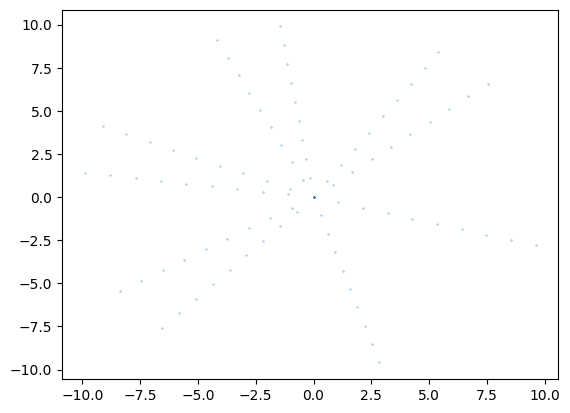

In [ ]:
density = 10
angles = [1,2,3,4,5,6,7,8,9,10]
radius = np.linspace(1e-3, 10, round(density))
r, theta = np.meshgrid(radius, angles)
x = (r*np.cos(theta)).flatten()
y = (r*np.sin(theta)).flatten()
print(len(x))
print(len(y))
print(((x <= 1) & (y <= 1)).sum())
plt.figure()
plt.plot(x,y, '.', markersize = 0.5)
plt.show()

In [34]:
filenames = ['Unique_Ellipse_cartesian',
            'Unique_Ellipse_polar',
            'Two_Circles_cartesian',
            'Two_Circles_polar',
            'Three_Circles_cartesian',
            'Three_Circles_polar',
            'Truncated_Once_cartesian',
            'Truncated_Once_polar',
            'Truncated_Twice_cartesian',
            'Truncated_Twice_polar']
x_list = []
label_list = []
ind_list = []
edge_index = []
for i in range(len(filenames)):
    data = np.load('Data/raw/'+filenames[i]+'_test2.npy', allow_pickle = True)
    x_list.append(data['coords'])
    label_list.append(data['labels'])
    ind_list.append(data.item()['slices'].astype(int))
    edge_index.append(data.item()['edge_index'])

In [28]:
print((label_list[i][j]).numpy())

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [36]:

for i in range(len(filenames)):
    for j in range(len(ind_list[i])-1):
        plt.figure()
        plt.plot(x_list[i][ind_list[i][j]:ind_list[i][j+1],0], x_list[i][ind_list[i][j]:ind_list[i][j+1],1], '.', markersize = 1)
        plt.xlim([0,10])
        plt.ylim([0,10])
        plt.title('Area = '+ str((label_list[i][j])))
        plt.savefig('Figures/'+filenames[i]+'/' + str(j))
        plt.close()

In [17]:
x = data.x
label = data.y

ind = slice['x'].tolist()
print(x.shape)
for i in range(10):
    plt.figure()
    plt.plot(x[ind[i]:ind[i+1],0], x[ind[i]:ind[i+1],1], '.', markersize = 1)
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()

AttributeError: 'NpzFile' object has no attribute 'x'

In [ ]:
print(ind_list[0])

[0, 11132, 54060, 54194, 54219, 54357, 54530, 56023, 57583, 58666, 59387]


In [ ]:
dict = {
    'label': np.arange(3),
    'edge_index': np.zeros((2,1)),
    'coordinates': [],
    'slices': [0]
}

density = 10
R = 3
center1 = (6,3)
r1 = 0.5
center2 = (3,3)
r2 = 0.5
truncated = True
cartesian = True
test1, area1 = get_multiple_circles(density, R, center1, r1, center2, r2, cartesian, truncated)
dict['coordinates'] = np.column_stack((dict['coordinates'],test1))
dict['edge_index'] = np.column_stack((dict['edge_index'],get_edge_index(test1,10)))
dict['slices'].append(len(test1))

density = 100
R = 5
center1 = (6,3)
r1 = 0.5
center2 = (3,3)
r2 = 0.5
truncated = False
cartesian = True
test2, area2 = get_multiple_circles(density, R, center1, r1, center2, r2, cartesian, truncated)
dict['coordinates'] = np.column_stack((dict['coordinates'],test2))
dict['edge_index'] = np.column_stack((dict['edge_index'],get_edge_index(test2,10)))
dict['slices'].append(len(test2))

density = 1000
R = 6
center1 = (6,3)
r1 = 0.5
center2 = (3,8)
r2 = 0.5
truncated = False
cartesian = False
test3, area3 = get_multiple_circles(density, R, center1, r1, center2, r2, cartesian, truncated)
dict['coordinates'] = np.column_stack((dict['coordinates'],test3))
dict['edge_index'] = np.column_stack((dict['edge_index'],get_edge_index(test3,10)))
dict['slices'].append(len(test3))



ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 0 and the array at index 1 has size 79

In [ ]:
print(np.shape(dict['coordinates']))
edge_index
a = np.empty((2,1))
c = [np.ones((2,6)), np.ones((2,6)),np.ones((2,6))]
b = np.hstack(c)


print(len(b))

(0,)
2


In [ ]:
a = np.arange(20000*10000)
b = np.arange(20000*10000)
c = np.arange(20000*10000)

In [7]:
data = np.load('Data/raw/Three_Circles_cartesian0.npz', allow_pickle = True)


In [8]:
coords     = data['coords']
slices     = data['slices']


In [15]:
a = slices[-1].astype(int)
b = slices[-2].astype(int)
coords[a:b,:]

array([], shape=(0, 2), dtype=float64)

In [6]:
a = np.arange(10)
print(a)
b = np.arange(2*(len(a)-1)).reshape((len(a)-1, 2))
print(b)
for i in range(len(a) - 1):
    print('A = ', a[i:i+2])
    print(b[a[i:i+2],:])

[0 1 2 3 4 5 6 7 8 9]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]]
A =  [0 1]
[[0 1]
 [2 3]]
A =  [1 2]
[[2 3]
 [4 5]]
A =  [2 3]
[[4 5]
 [6 7]]
A =  [3 4]
[[6 7]
 [8 9]]
A =  [4 5]
[[ 8  9]
 [10 11]]
A =  [5 6]
[[10 11]
 [12 13]]
A =  [6 7]
[[12 13]
 [14 15]]
A =  [7 8]
[[14 15]
 [16 17]]
A =  [8 9]


IndexError: index 9 is out of bounds for axis 0 with size 9

In [1]:
coords[0:2, :]

NameError: name 'coords' is not defined

In [16]:
graph = Data(x=coords, edge_index=edge_index, y=labels)

In [20]:
np.amax(np.ones((10,2)), axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1]:
%pip install --upgrade pip
%pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
%pip install torch-sparse==0.6.13 -f https://pytorch-geometric.com/whl/torch-1.10.0+cu113.html
%pip install torch-geometric
%pip install torch-cluster -f https://data.pyg.org/whl/torch-1.12.1+cu113.html

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html
DEPRECATION: Configuring installation scheme with distutils config files is deprecated 

In [3]:
from dataset import *
import torch

In [5]:
dataset = EllipsesDataset(root = 'Data')

Processing...


--- File  1 / 16  ---
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_8022/2559240680.py", line 1, in <module>
    dataset = EllipsesDataset(root = 'Data')
  File "/Users/tabtab/Documents/EPFL/Master/CERN/GNN_circle/dataset.py", line 237, in __init__
    super().__init__(root, transform, pre_transform, pre_filter)
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch_geometric/data/in_memory_dataset.py", line 50, in __init__
    super().__init__(root, transform, pre_transform, pre_filter)
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch_geometric/data/dataset.py", line 87, in __init__
    self._process()
  File "/Users/tabtab/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch_geometric/data/dataset.py", line 

In [15]:
x = np.ones(100)
torch.tensor(x, dtype = torch.float32)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
import numpy as np
data = np.load('Data/raw/Two_Circles_cartesian0.npz', allow_pickle= True)
slices = data['slices']


In [11]:
print('number of points in average per sample', slices[-1]/(len(slices)-1))

number of points in average per sample 1923.09342


In [8]:
np.save('/Volumes/A001/GNN_circle/Data.npy', np.arange(100))

In [3]:
data = np.load('Data/raw/Three_Circles_cartesian0.npz')

In [5]:
data['slices']

array([0.0000000e+00, 4.9240000e+03, 4.9970000e+03, ..., 8.0542537e+07,
       8.0542680e+07, 8.0542738e+07])

# test dataset generated 

In [2]:
data = torch.load('/Volumes/A001/GNN_circle/Data/processed/data_3.dt')

In [3]:
data_, dict = data


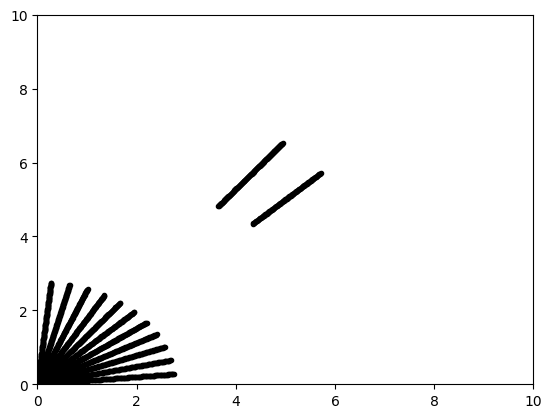

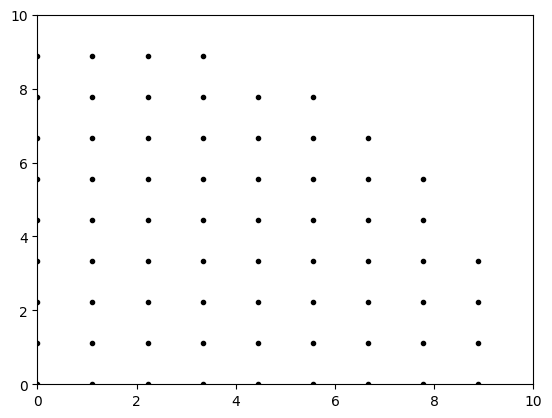

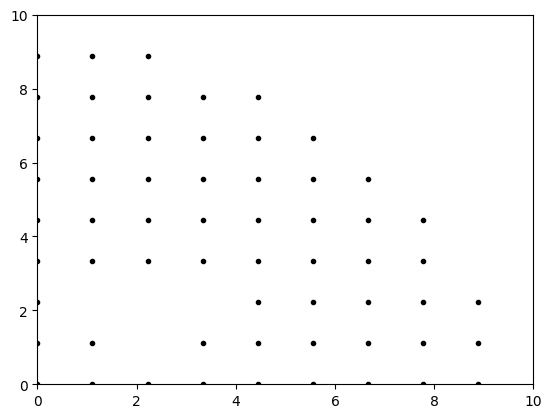

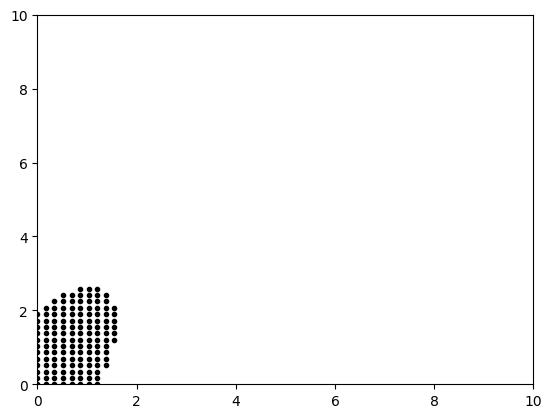

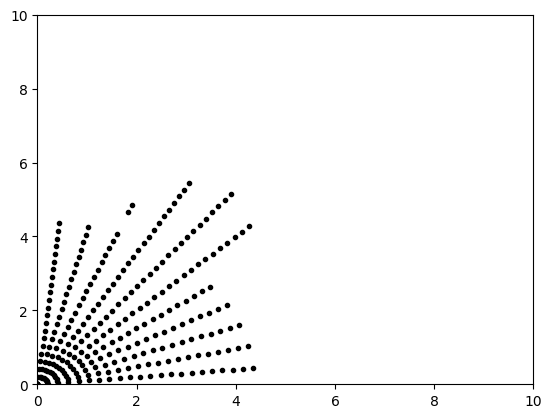

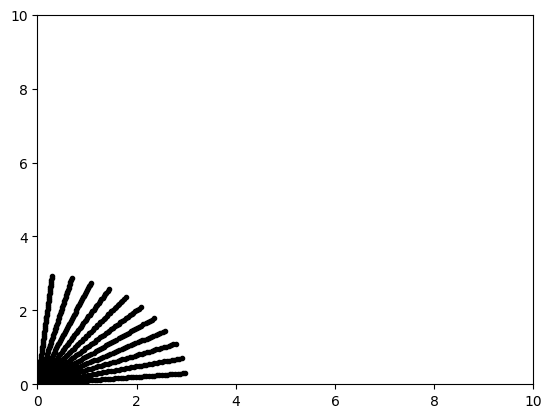

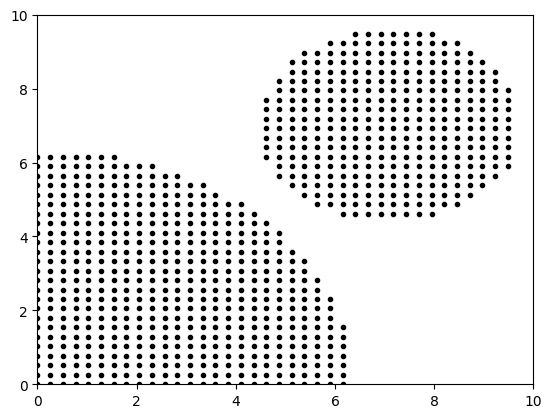

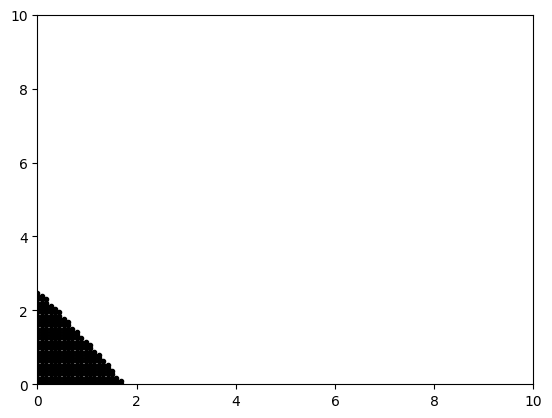

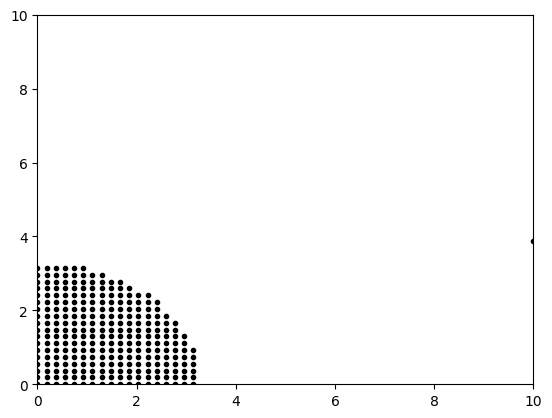

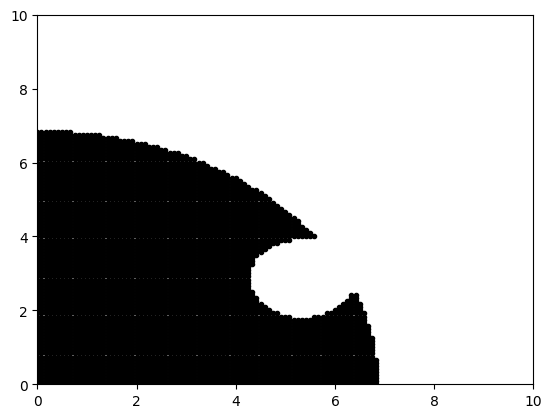

In [4]:
# pick 10 random indices 
samples_idx = np.random.randint(0, len(dict['x']), (10,))
torch.Tensor.ndim = property(lambda self: len(self.shape))  # Fix it

for idx in samples_idx:
    x_s, x_e = dict['x'][idx].item(), dict['x'][idx+1].item()
    x = data_.x[x_s:x_e]
    plt.figure()
    plt.plot(x[:,0],x[:,1] , 'k.')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()

In [4]:
dataset = test('Data/')

In [5]:
len(dataset)

50000

In [136]:
idx = 102
x_s, x_e = dict['edge_index'][idx].item(), dict['edge_index'][idx+1].item()
data_.edge_index[:, x_s:x_e]
dict['edge_index'][idx].item()


2048040

In [6]:
%pip freeze > requirement.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
class test2(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])


    @property
    def raw_file_names(self):
        return ['Three_Circles_cartesian0.npz',
                'Three_Circles_cartesian1.npz',
                'Three_Circles_polar3.npz',
                'Three_Circles_polar4.npz',
                'Truncated_Once_cartesian0.npz',
                'Truncated_Once_cartesian1.npz',
                'Truncated_Once_polar3.npz',
                'Truncated_Once_polar4.npz',
                'Truncated_Twice_cartesian0.npz',
                'Truncated_Twice_cartesian1.npz',
                'Truncated_Twice_polar3.npz',
                'Truncated_Twice_polar4.npz',
                'Two_Circles_cartesian0.npz',
                'Two_Circles_cartesian1.npz',
                'Two_Circles_polar3.npz',
                'Two_Circles_polar4.npz',
                'Unique_Ellipse_cartesian0.npz',
                'Unique_Ellipse_cartesian1.npz',
                'Unique_Ellipse_polar2.npz',
                'Unique_Ellipse_polar3.npz']

    @property
    def processed_file_names(self):
        return ['data_000.dt']

    def process(self):
        j = 0
        data_list = []
        for filename in self.raw_file_names:
            print('--- File ', j+1, '/', len(self.raw_file_names), ' ---')
            with np.load(osp.join(self.raw_dir, filename), allow_pickle = True) as data:
                coords     = data['coords']
                slices     = data['slices'].astype(int)
                labels     = data['labels']
                edge_index = data['edge_index']
            
            print(labels)
            for i in tqdm(range(round(len(labels)/4))):
                idx1 = slices[i]
                idx2 = slices[i+1]
                data_list.append(create_graph(coords[idx1:idx2, :], edge_index[:, idx1*10:idx2*10], labels[i]))
            j += 1
            
        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

In [3]:
data = test2('Data')

Processing...


--- File  1 / 20  ---
[124.0116246  255.00103551 167.57963112 ... 161.83828641   8.69554243
 167.51676085]


100%|██████████| 12500/12500 [00:02<00:00, 4510.85it/s]


--- File  2 / 20  ---


KeyboardInterrupt: 

In [6]:
a = [3,4,5]
a = [i/3 for i in a]

In [7]:
def get(idx):  
    data = np.load('Data/raw/Three_Circles_cartesian0.npz')
    

In [34]:
data1 = np.load('Data/raw/Three_Circles_cartesian0.npz', allow_pickle= True, mmap_mode= 'r')
data2 = np.load('Data/raw/Three_Circles_cartesian1.npz', allow_pickle= True, mmap_mode= 'r')
data3 = np.load('Data/raw/Three_Circles_cartesian0.npz', allow_pickle= True, mmap_mode= 'r')
data4 = np.load('Data/raw/Three_Circles_cartesian1.npz', allow_pickle= True, mmap_mode= 'r')

slices1 = data1['slices']
slices2 = data2['slices']
coords = data1['coords']
coords2 = data2['coords']
coords3 = data3['coords']
coords4 = data4['coords']

In [33]:
import numpy as np
import glob
fnames = glob.glob('Data/raw/*')
n_samples = 200
n_samples_per_file = int(n_samples/len(fnames))

counter = 0

coords     = np.empty((0,2), np.float64)
slices     = np.array([0])
labels     = np.array([])
edge_index = np.empty((2,0), np.float64)

for path in fnames:
    print('File ', counter)

    with np.load(path, allow_pickle = True) as data:
        slices_temp = data['slices'][1:n_samples_per_file+1].astype(int)
        coords = np.vstack((coords, data['coords'][:round(slices_temp[-1]), :]/10)) # normalize by max x, y
        labels = np.append(labels, data['labels'][:n_samples_per_file]/400) # Normalize by the area of a square
        edge_index = np.hstack((edge_index, data['edge_index'][:, :round(slices_temp[-1]*10)]/10)) #normalize by max x, y
        slices = np.append(slices, slices_temp + slices[-1])
    
    del slices_temp

    counter += 1

File  0
File  1
File  2


336.9627474094878

Sample number 15148


/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_41158/3973163148.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 25000 + 1) instead
  samples_idx = np.random.random_integers(0,25000, (10,))


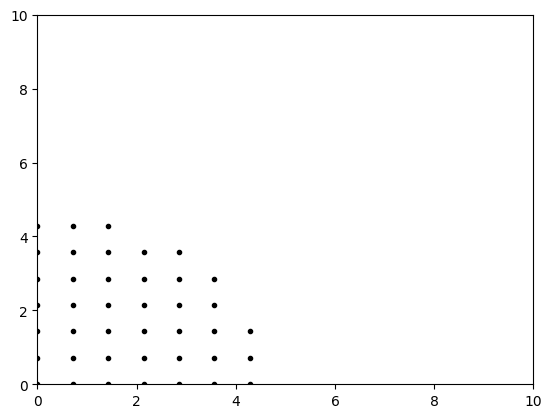

Sample number 6567


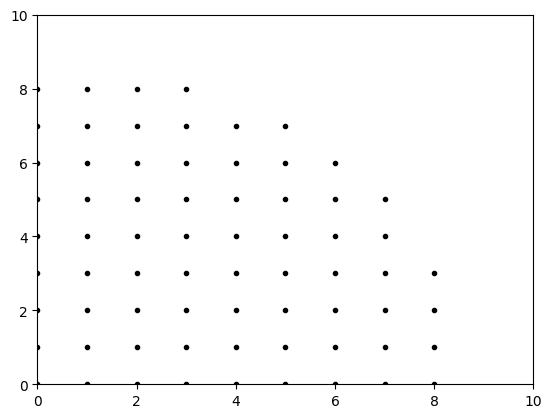

Sample number 24661


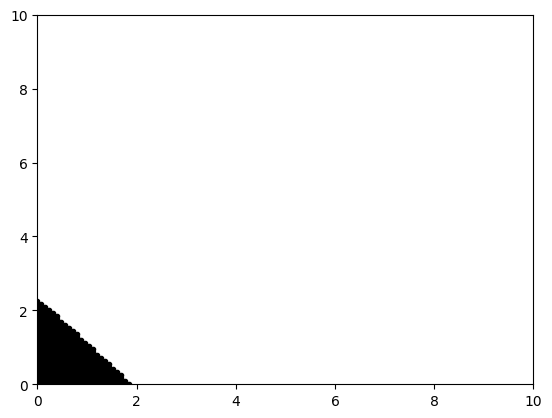

Sample number 4340


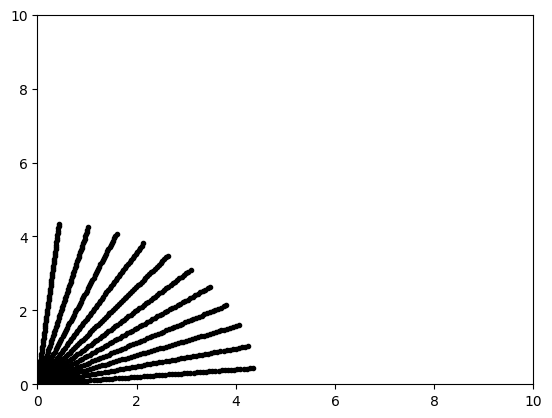

Sample number 9342


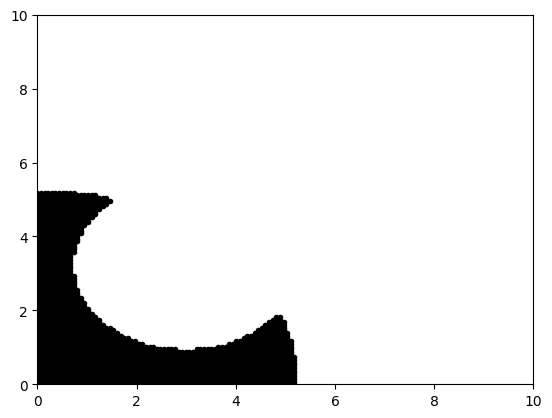

Sample number 17362


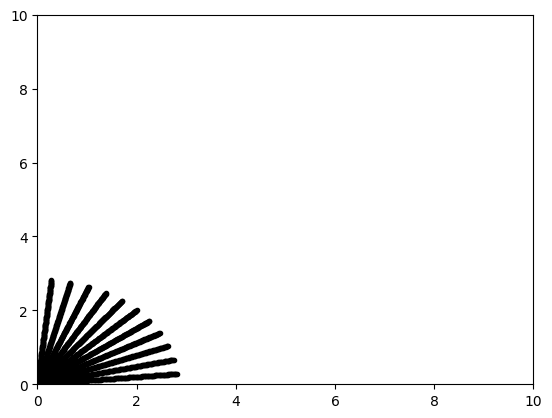

Sample number 6029


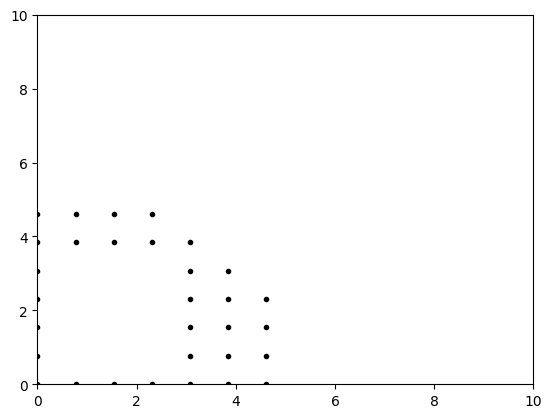

Sample number 11937


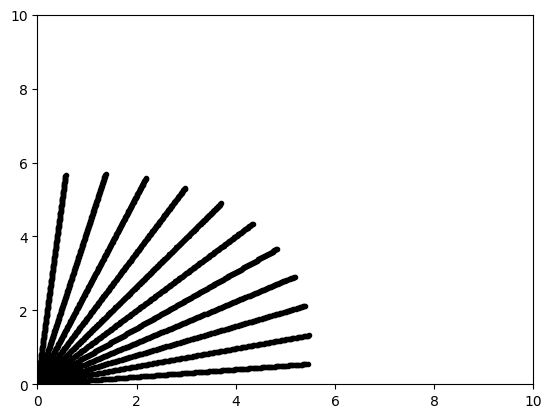

Sample number 22678


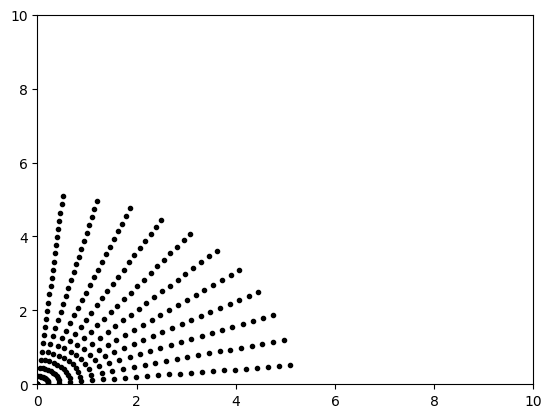

Sample number 18383


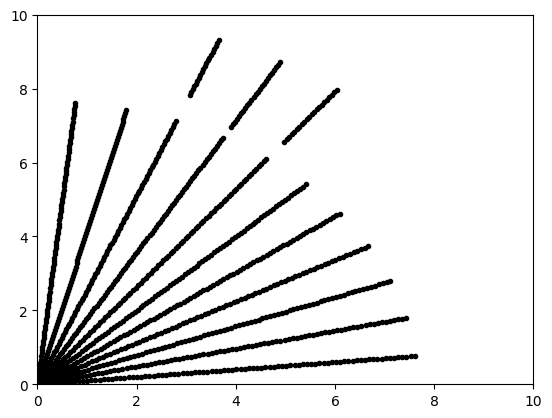

In [31]:
samples_idx = np.random.random_integers(0,25000, (10,))
slices = slices.astype(int)
for idx in samples_idx:
    print('Sample number', idx)
    plt.figure()
    plt.plot(coords[slices[idx]:slices[idx+1],0],coords[slices[idx]:slices[idx+1],1] , 'k.')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()

In [32]:
data = np.load(path, allow_pickle = True)
print(data['coords'][:slices[]])
slices = data['slices'].astype(int)[:50000+1]

a = coords[0]
b = slices[0]
c = np.append(np.array([]), b)
c = b+b[-1]
c

[[0.         0.        ]
 [0.08       0.        ]
 [0.16       0.        ]
 ...
 [1.81818182 6.36363636]
 [2.72727273 6.36363636]
 [0.         7.27272727]]


array([ 80542739,  80547663,  80547736, ..., 161085276, 161085419,
       161085477])

In [75]:
import numpy as np
import glob
from torch.utils.data import Dataset

def load_samples_in_memory(n_samples, fnames):

    n_samples_per_file = int(n_samples/len(fnames))
    counter = 0

    coords     = np.empty((0,2), np.float64)
    slices     = np.array([0])
    labels     = np.array([])
    edge_index = np.empty((2,0), np.float64)

    for path in fnames:
        print('File ', counter)

        with np.load(path, allow_pickle = True) as data:
            slices_temp = data['slices'][1:n_samples_per_file+1].astype(int)
            coords = np.vstack((coords, data['coords'][:round(slices_temp[-1]), :]))
            labels = np.append(labels, data['labels'][:n_samples_per_file])
            edge_index = np.hstack((edge_index, data['edge_index'][:, :round(slices_temp[-1]*10)]))
            slices = np.append(slices, slices_temp + slices[-1])
        
        del slices_temp

        counter += 1
    return coords, slices, labels , edge_index

class CustomDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, root_dir, n_samples, normalize = True, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.fnames = glob.glob(root_dir + '/*')
        self.fnames = ['Data/raw/Two_Circles_polar3.npz', 'Data/raw/Two_Circles_polar4.npz']
        self.n_samples = n_samples
        self.coords, self.slices, self.labels, self.edge_index = load_samples_in_memory(self.n_samples, self.fnames)

        if normalize:

            # Min-max normalization by the max value of x,y
            self.coords /= 10
            self.edge_index /= 10

            # Min-Max normalizaation by the max value of area: area of 4 10x10 squares
            self.labels /= 400


    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        idx_s, idx_e = self.slices[idx], self.slices[idx+1]
        coords = torch.from_numpy(self.coords[idx_s:idx_e, :])
        label = torch.from_numpy([self.labels[idx]])
        edge_index = torch.from_numpy(self.edge_index[:, idx_s*10:idx_e*10])

        sample = {'coords': coords.float(), 'edge_index': edge_index.float(), 'label': label.float()}

        if self.transform:
            sample = self.transform(sample)

        return sample


In [76]:
dataset = CustomDataset('Data/raw', 200)

File  0
File  1


In [77]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=8, shuffle = True)


In [78]:
for i in dataloader:
    print(i)

TypeError: expected np.ndarray (got list)

In [29]:
data = np.load('Data/raw/Three_Circles_cartesian0.npz')
data['slices'][:450].astype(int)

array([     0,   4924,   4997,   5055,  10143,  14997,  15010,  15062,
        15572,  21501,  22119,  22705,  22769,  29213,  29272,  36913,
        39859,  39874,  45067,  49699,  49712,  49739,  50511,  51180,
        57026,  57078,  57798,  57820,  63177,  68860,  69491,  69513,
        69666,  75949,  75984,  76036,  82554,  89099,  89140,  89715,
        95340,  95723,  95775,  95837,  95893,  97211,  97333, 101164,
       103775, 103823, 103843, 110594, 114754, 114777, 114818, 116791,
       120951, 121814, 122382, 122969, 127798, 128530, 128563, 129175,
       129216, 129257, 129841, 130292, 130914, 130960, 131017, 135823,
       135979, 141730, 142264, 142943, 148002, 148071, 148084, 148140,
       153875, 153908, 153934, 158295, 160108, 164587, 166998, 167677,
       175227, 178367, 178913, 180586, 180878, 182310, 185140, 185159,
       185190, 187781, 193835, 193904, 200248, 207667, 209089, 209154,
       209216, 209249, 211159, 215942, 215979, 223180, 223631, 223646,
      

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GraphSAGE(hidden_channels=64).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, eps = 1e-7)

In [12]:
model, optimizer, epoch = load_checkpoint(model, optimizer, 'History/checkpoint20221205-094414.pt')

In [108]:
def make_predicion(test_set):
    print('Predicting')
    model.eval()
    preds = np.array([])
    labels = np.array([])
    with torch.no_grad():
        for data in tqdm(test_set):
            data = data.to(device)
            preds = np.append(preds, model(data)[:,0].numpy()*np.pi*100)
            labels = np.append(labels, data.y.numpy())

    return preds, labels

In [106]:
dataset = test(root='Data', dataset_nb = '_1')

In [107]:
preds, labels = make_predicion(dataset)

Predicting
50000


100%|██████████| 50000/50000 [02:05<00:00, 399.68it/s]


In [109]:
abs_error = np.abs(preds-labels)/labels

In [110]:
import pandas as pd
df = pd.DataFrame(data= [labels, preds, abs_error]).T
df.columns = ['labels', 'preds', 'abs_error']
df = df.reset_index(level = 0)
df.abs_error.describe()

count    50000.000000
mean         0.305282
std          1.587975
min          0.000002
25%          0.021999
50%          0.059509
75%          0.185854
max        101.097724
Name: abs_error, dtype: float64

<AxesSubplot: >

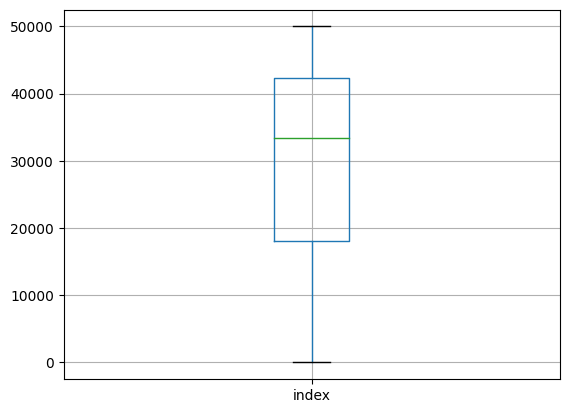

In [116]:
df[df.abs_error>0.1][['index']].boxplot()

In [172]:
df['category'] = 'Na'
df['polar'] = True
names = dataset.raw_file_names
df = df.sort_values(by = 'index')
df.iloc[0:10000, 4] = '3 circles'
df.iloc[0:5000, 5] = False
df.iloc[10000:20000, 4] = 'truncated 1'
df.iloc[10000:15000, 5] = False
df.iloc[20000:30000, 4] = 'truncated 2'
df.iloc[25000:30000, 5] = False
df.iloc[30000:40000, 4] = '2 circles'
df.iloc[30000:35000, 5] = False
df.iloc[40000:50000, 4] = 'ellipse'
df.iloc[40000:45000, 5] = False
df

,index,labels,preds,abs_error,category,polar
0,0,76.832268,80.013580,0.041406,3 circles,False
1,1,10.132165,11.795727,0.164186,3 circles,False
2,2,249.047348,253.315445,0.017138,3 circles,False
3,3,13.048016,18.118534,0.388605,3 circles,False
4,4,257.053650,257.747833,0.002701,3 circles,False
...,...,...,...,...,...,...
49995,49995,27.653986,39.742222,0.437125,ellipse,True
49996,49996,37.041157,42.442410,0.145818,ellipse,True
49997,49997,11.996290,17.521658,0.460590,ellipse,True
49998,49998,184.895065,195.323517,0.056402,ellipse,True


In [173]:
df.category.unique()

array(['3 circles', 'truncated 1', 'truncated 2', '2 circles', 'ellipse'],
      dtype=object)

In [214]:
df_grouped = df[['abs_error', 'category', 'polar']].groupby(by = ['category', 'polar']).agg('mean')
df_grouped.head(10)

abs_error
category    polar           
2 circles   False   1.377838
            True    0.351480
3 circles   False   0.124071
            True    0.092461
ellipse     False   0.401641
            True    0.289718
truncated 1 False   0.124598
            True    0.098683
truncated 2 False   0.087439
            True    0.104887

<AxesSubplot: xlabel='category,polar'>

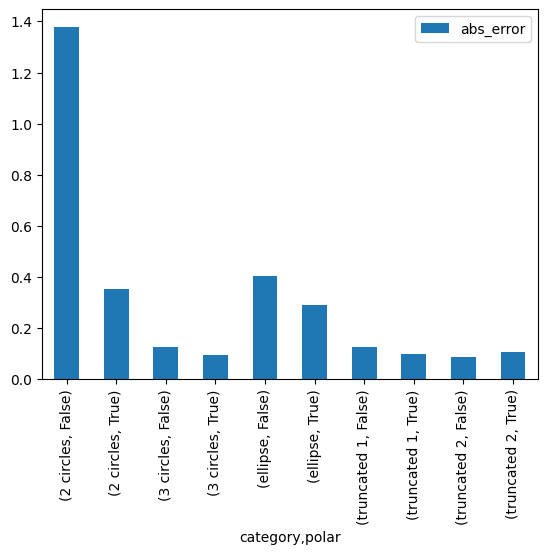

In [215]:
df_grouped.plot.bar(color = ['tab:blue', 'tab:orange', 'tab:blue', 'tab:orange', 'tab:blue', 'tab:orange', 'tab:blue', 'tab:orange', 'tab:blue', 'tab:orange'])


32783


/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_69605/3721045455.py:11: UserWarning: No contour levels were found within the data range.
  plt.contour(x[:,0],x[:,1], np.ones((len(x[:,0]),len(x[:,1]))), color = 'red')
/var/folders/9y/ryc1xybn5gbczjsb6wzyvwr40000gn/T/ipykernel_69605/3721045455.py:11: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(x[:,0],x[:,1], np.ones((len(x[:,0]),len(x[:,1]))), color = 'red')


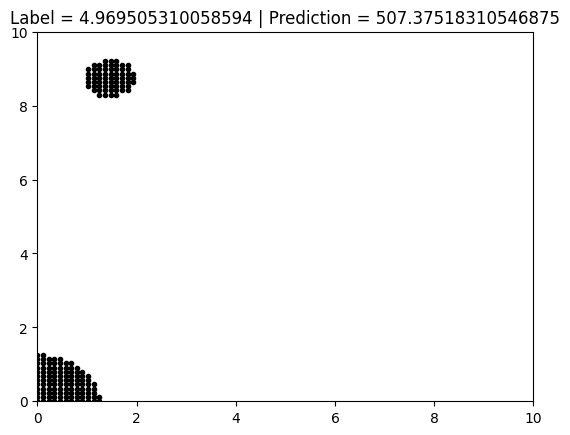

32237


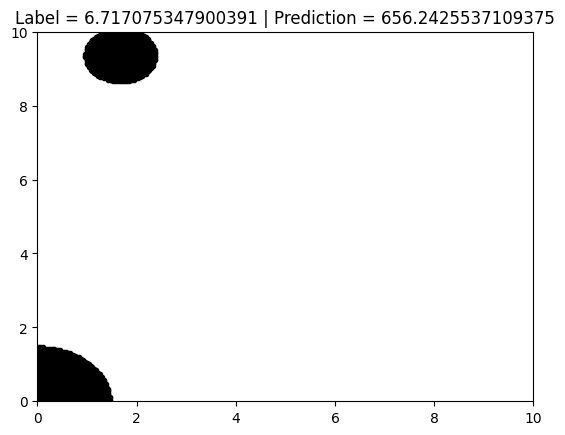

33094


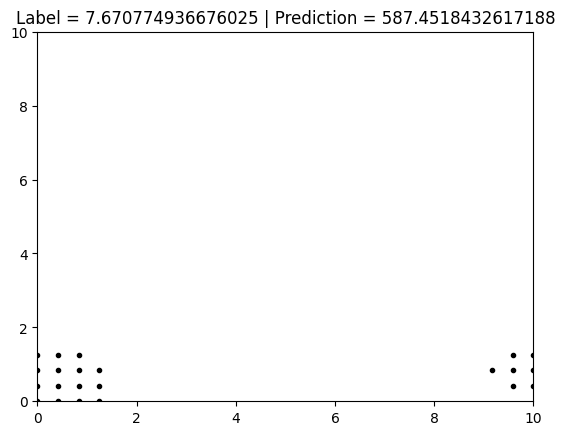

31171


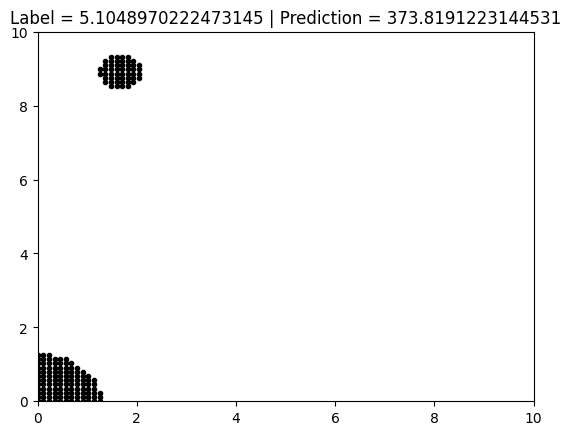

32071


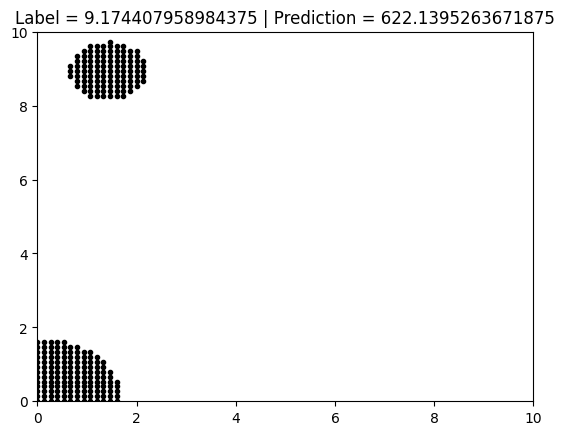

In [490]:
torch.Tensor.ndim = property(lambda self: len(self.shape))  # Fix it
df = df.sort_values(by = 'abs_error', ascending = False)
index = df.head(5)['index'].to_list()
for idx in index:
    data = dataset[idx]
    x = data.x
    plt.figure()
    plt.title('Label = ' + str(labels[idx]) + ' | Prediction = ' + str(preds[idx]))
    plt.plot(x[:,0],x[:,1] , 'k.')
    plt.contour(x[:,0],x[:,1], np.ones((len(x[:,0]),len(x[:,1]))), color = 'red')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.show()

In [378]:
def coords_equal(coords, Z, eps):
    a = np.zeros(Z.shape)
    for i in range(len(Z)):
        for j in range(len(Z)):
            a[i, j] = int(np.abs(coords - Z))
    return np.abs(coords - Z) < eps

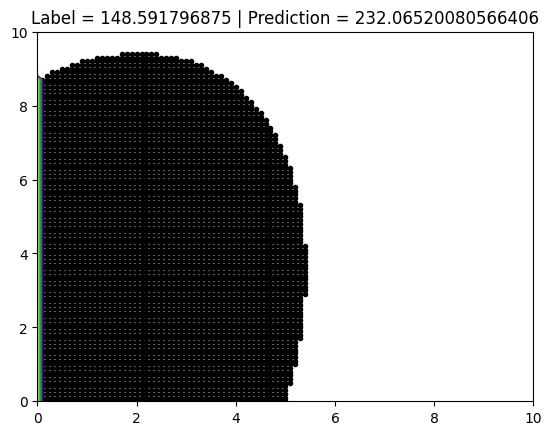

In [501]:
idx = 40000
data0 = dataset[idx]
approx = 5
coords = np.round(data0.x.numpy().astype(np.float64),approx)
delta = round(coords[1,0] - 0, approx)

x = np.arange(0, 10, delta)
y = np.arange(0, 10, delta)
X, Y = np.meshgrid(x, y)
b = np.c_[np.round(X,approx)[:,:, np.newaxis], np.round(Y,approx)[:,:, np.newaxis]]
d = b.reshape(len(b)**2, 2)
Z = (d[:, None] == c).all(-1).any(-1).reshape(X.shape)
plt.figure()
plt.title('Label = ' + str(labels[idx]) + ' | Prediction = ' + str(preds[idx]))
plt.plot(coords[:,0],coords[:,1] , 'k.')
contour = plt.contour(X, Y, Z)
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

In [470]:
path_min_turns    = contour.collections[0].get_paths()[0]
v_min_turns       = path_min_turns.vertices

contour2 = np.float32(np.array(v_min_turns))
import cv2 as cv
area = cv.contourArea(contour2)
print(area*4)

98.33999965995565


In [502]:
data0 = dataset[40000]
approx = 5
coords = np.round(data0.x.numpy().astype(np.float64),approx)
coords = np.vstack(coords, -coords)
delta = round(coords[1,0] - 0, approx)

x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)
X, Y = np.meshgrid(x, y)
b = np.c_[np.round(X,approx)[:,:, np.newaxis], np.round(Y,approx)[:,:, np.newaxis]]
d = b.reshape(10000, 2)
Z = (d[:, None] == c).all(-1).any(-1).reshape(100,100)
plt.figure()
plt.title('Label = ' + str(labels[40000]) + ' | Prediction = ' + str(preds[40000]))
plt.plot(coords[:,0],coords[:,1] , 'k.')
contour = plt.contour(X, Y, Z, color = 'red')
plt.xlim([0,10])
plt.ylim([0,10])
plt.show()

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

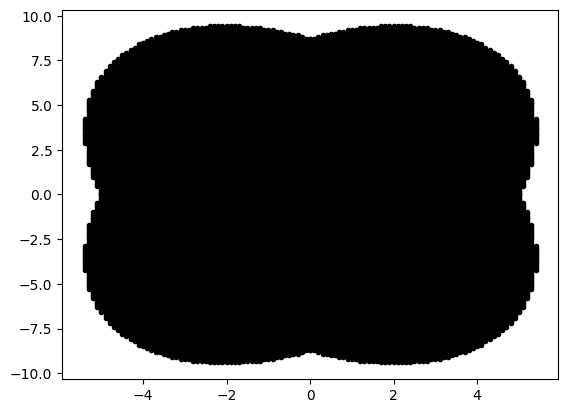

In [489]:
a = coords.copy()
b = -coords.copy()
c = coords.copy()
d = coords.copy()
c[:, 0] = -c[:,0]
d[:, 1] = -d[:,1]
a = np.vstack((a, b, c, d))
plt.figure()
plt.plot(a[:,0], a[:,1], 'k.')

In [514]:
def reconstruct_beam(coords):
    out = coords.copy()
    b = -coords.copy()
    c = coords.copy()
    d = coords.copy()
    c[:, 0] = -c[:,0]
    d[:, 1] = -d[:,1]
    out = np.vstack((out, b, c, d))

    return out

In [520]:
points, area = get_ellipse(1000, (5,3), cartesian = False)

(-10.0, 10.0)

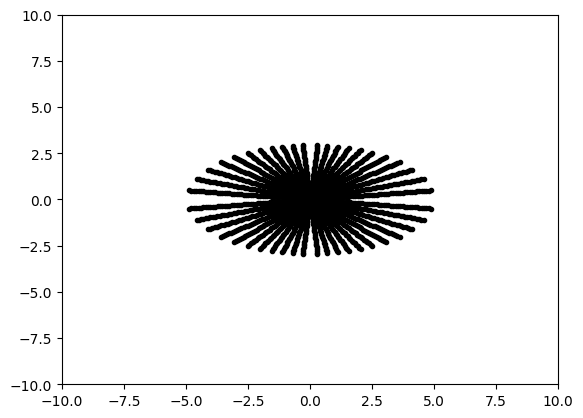

In [521]:
plt.figure()
points = reconstruct_beam(points)
plt.plot(points[:,0], points[:,1], 'k.')
plt.xlim([-10, 10])
plt.ylim([-10, 10])

## Explore cern values

In [530]:
np.linspace(0, 15, 10)


array([ 0.        ,  1.66666667,  3.33333333,  5.        ,  6.66666667,
        8.33333333, 10.        , 11.66666667, 13.33333333, 15.        ])